In [4]:
import numpy as np
from scipy.spatial.distance import squareform, pdist
from scipy.stats            import entropy

import pandas as pd
import os, glob
import re

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne   import _joint_probabilities

import seaborn as sns
import matplotlib.pyplot as plt

dat_dir = "/data/clintko/SMPK"

In [5]:
%matplotlib inline

In [11]:
def get_similarity(X, perplexity = 30, verbose = False):
    """calculate the similarity matrix Pi|j + Pj|i
    ref: https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm
    """
    # Pairwise distances between all data points.
    D = pairwise_distances(X, squared=True)
    
    # Similarity with variable sigma.
    P = _joint_probabilities(D, perplexity, verbose)
    return P

def kl_div(P1, P2):
    """calculate KL divergence"""
    return entropy(P1.ravel(), P2.ravel())

def js_div(P1, P2):
    """calculate Jensen-Shannon Divergence"""
    return 0.5 * (kl_div(P1, P2) + kl_div(P2, P1))

In [9]:
!ls /data/clintko/SMPK/ep8cs_tsne_similarity*

/data/clintko/SMPK/ep8cs_tsne_similarity_cal_prior05.npy
/data/clintko/SMPK/ep8cs_tsne_similarity_cal_prior06.npy
/data/clintko/SMPK/ep8cs_tsne_similarity_cal_prior07.npy
/data/clintko/SMPK/ep8cs_tsne_similarity_cal_prior08.npy
/data/clintko/SMPK/ep8cs_tsne_similarity_cal_prior09.npy
/data/clintko/SMPK/ep8cs_tsne_similarity_cal_prior10.npy
/data/clintko/SMPK/ep8cs_tsne_similarity_cal_prior11.npy
/data/clintko/SMPK/ep8cs_tsne_similarity_cal_prior12.npy
/data/clintko/SMPK/ep8cs_tsne_similarity_cal_prior13.npy
/data/clintko/SMPK/ep8cs_tsne_similarity_cal_prior14.npy
/data/clintko/SMPK/ep8cs_tsne_similarity_cal_prior15.npy
/data/clintko/SMPK/ep8cs_tsne_similarity_cal_prior20.npy
/data/clintko/SMPK/ep8cs_tsne_similarity_cal_prior25.npy
/data/clintko/SMPK/ep8cs_tsne_similarity_cal_prior30.npy
/data/clintko/SMPK/ep8cs_tsne_similarity_cal_prior35.npy
/data/clintko/SMPK/ep8cs_tsne_similarity_cal_prior40.npy
/data/clintko/SMPK/ep8cs_tsne_similarity_cal_prior45.npy
/data/clintko/SMPK/ep8cs_tsne_s

In [22]:
os.path.join(dat_dir, "ep8cs_tsne_similarity" + "_raw.npy")

'/data/clintko/SMPK/ep8cs_tsne_similarity_raw.npy'

In [23]:
y_raw = np.load(os.path.join(
    dat_dir, 
    "ep8cs_tsne_similarity" + "_raw.npy"))

In [24]:
y_cal05 = np.load(os.path.join(
    dat_dir, 
    "ep8cs_tsne_similarity_cal_prior05.npy"))

In [26]:
print(y_raw.shape)
print(y_cal05.shape)

(49995000, 18)
(49995000, 18)


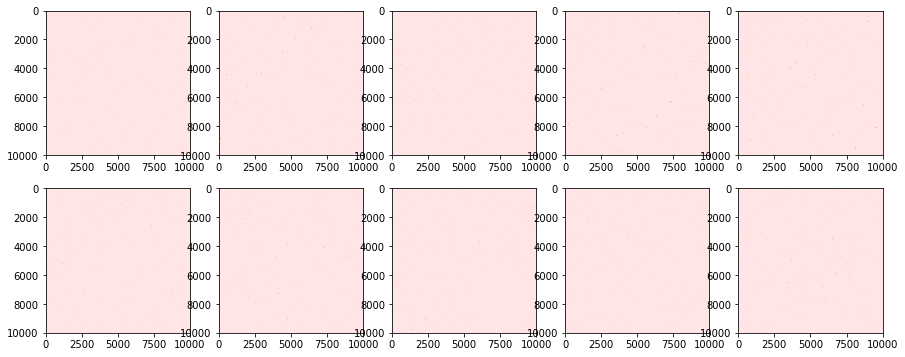

In [44]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(5*3,2*3))
axes = axes.ravel()
pal  = sns.light_palette("red", as_cmap=True)

for idx in range(10):
    P     = y_raw[:, idx]
    P_sym = squareform(P)
    
    ax = axes[idx]
    ax.imshow(P_sym, interpolation='none', cmap=pal)
pass

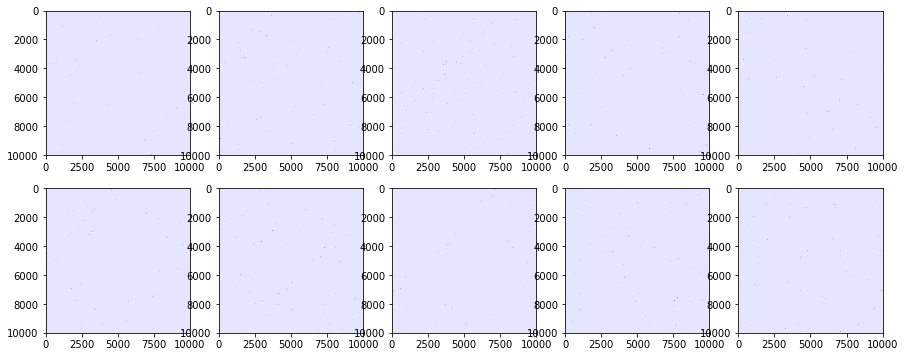

In [28]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(5*3,2*3))
axes = axes.ravel()
pal  = sns.light_palette("blue", as_cmap=True)

for idx in range(10):
    P     = y_cal05[:, idx]
    P_sym = squareform(P)
    
    ax = axes[idx]
    ax.imshow(P_sym, interpolation='none', cmap=pal)
pass

# pairwise divergence in raw (before calculation)

In [32]:
mat = np.zeros((18, 18))
mat.shape

(18, 18)

In [35]:
mat = np.zeros((18, 18))
for i in range(18):
    for j in range(18):
        p1 = y_raw[:, i]
        p2 = y_raw[:, j]
        mat[i, j] = js_div(p1, p2)

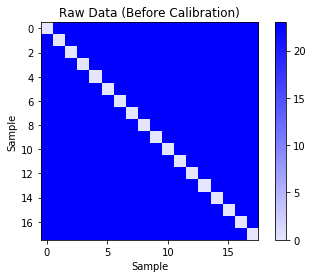

In [54]:
pal = sns.light_palette("blue", as_cmap=True)
plt.imshow(mat, interpolation='none', cmap=pal)
plt.title("Raw Data (Before Calibration)")
plt.xlabel("Sample")
plt.ylabel("Sample")
plt.colorbar()

In [37]:
%%time
mat05 = np.zeros((18, 18))
for i in range(18):
    print(i)
    for j in range(18):
        p1 = y_cal05[:, i]
        p2 = y_cal05[:, j]
        mat05[i, j] = js_div(p1, p2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
CPU times: user 10min 16s, sys: 3min 12s, total: 13min 28s
Wall time: 13min 29s


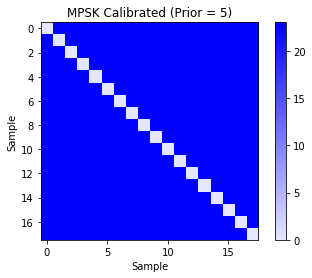

In [53]:
pal = sns.light_palette("blue", as_cmap=True)
plt.imshow(mat05, interpolation='none', cmap=pal)
plt.title("MPSK Calibrated (Prior = 5)")
plt.xlabel("Sample")
plt.ylabel("Sample")
plt.colorbar()

In [39]:
%%time
mat_raw_vs_cal05 = np.zeros((18, 18))
for i in range(18):
    print(i)
    for j in range(18):
        p1 = y_raw[  :, i]
        p2 = y_cal05[:, j]
        mat_raw_vs_cal05[i, j] = js_div(p1, p2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
CPU times: user 10min 45s, sys: 3min 11s, total: 13min 57s
Wall time: 13min 58s


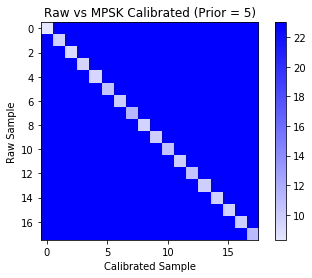

In [49]:
pal = sns.light_palette("blue", as_cmap=True)
plt.imshow(mat_raw_vs_cal05, interpolation='none', cmap=pal)
plt.title("Raw vs MPSK Calibrated (Prior = 5)")
plt.xlabel("Calibrated Sample")
plt.ylabel("Raw Sample")
plt.colorbar()

In [41]:
np.diag(mat_raw_vs_cal05)

array([ 8.30796201,  9.5723166 ,  8.98409043,  9.43983349,  9.33710001,
       10.49548114,  9.91694992, 11.3299316 ,  9.47278823,  9.90962012,
       10.59804222,  9.88282034, 10.57483994,  9.79364777,  9.61871736,
        9.60108799,  9.86181031, 11.06956375])

In [42]:
mat_raw_vs_cal05[:5, :5]

array([[ 8.30796201, 22.96782184, 22.9589476 , 22.96867489, 22.96567703],
       [22.97470366,  9.5723166 , 22.97008839, 22.99119688, 22.98387933],
       [22.96528467, 22.97394723,  8.98409043, 22.98495217, 22.97205814],
       [22.99092947, 22.9969932 , 22.99431796,  9.43983349, 22.99922289],
       [22.96767684, 22.97002613, 22.95771654, 22.977436  ,  9.33710001]])

In [50]:
mat_raw = mat

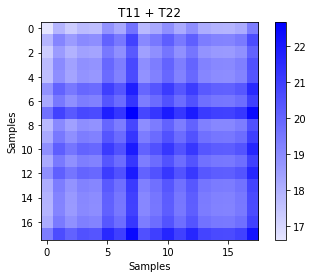

In [52]:
tii = np.diag(mat_raw_vs_cal05)
mat_trans = np.zeros((18, 18))
for i in range(18):
    for j in range(18):
        mat_trans[i, j] = tii[i] + tii[j]

pal = sns.light_palette("blue", as_cmap=True)
plt.imshow(mat_trans, interpolation='none', cmap=pal)
plt.title("T11 + T22")
plt.xlabel("Samples")
plt.ylabel("Samples")
plt.colorbar()

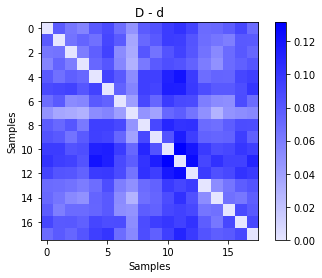

In [62]:
tmp = (mat05 - mat_raw)
pal = sns.light_palette("blue", as_cmap=True)
plt.imshow(tmp, interpolation='none', cmap=pal)
plt.title("D - d")
plt.xlabel("Samples")
plt.ylabel("Samples")
plt.colorbar()

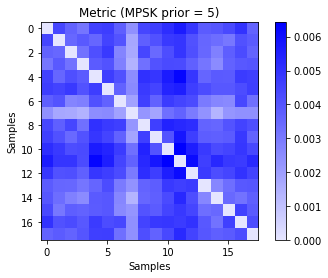

In [61]:
mat_metric = (mat05 - mat_raw) / mat_trans
pal = sns.light_palette("blue", as_cmap=True)
plt.imshow(mat_metric, interpolation='none', cmap=pal)
plt.title("Metric (MPSK prior = 5)")
plt.xlabel("Samples")
plt.ylabel("Samples")
plt.colorbar()